In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
exp1 = pd.read_csv('../scripts/results/exp_sensor1.txt', sep = ";")
exp2 = pd.read_csv('../scripts/results/exp_sensor2.txt', sep = ";")
exp3 = pd.read_csv('../scripts/results/exp_sensor2_1.txt', sep = ";")

In [3]:
exp1['goal'] = np.where(exp1['next_state'] == 'i_gl', 1, 0)
exp2['goal'] = np.where(exp2['next_state'] == 'i_gl', 1, 0)
exp3['goal'] = np.where(exp3['next_state'] == 'i_gl', 1, 0)

In [4]:
exp1.head()

,env,config,exp,energy,current,next_state,next_move,goal
0,16x16,exp_sensor1,0,200,i_ini,i_vz,3,0
1,16x16,exp_sensor1,0,199,i_vz,i_b,3,0
2,16x16,exp_sensor1,0,198,i_b,i_vz,3,0
3,16x16,exp_sensor1,0,197,i_vz,i_vz,0,0
4,16x16,exp_sensor1,0,196,i_vz,i_vz,0,0


In [5]:
exp3.head()

,env,config,exp,energy,current,next_state,next_move,counter_x,counter_y,goal
0,10x10,exp_sensor2,0,100,i_ini,i_vz,0,1.0,0.0,0
1,10x10,exp_sensor2,0,99,i_vz,i_vz,0,2.0,0.0,0
2,10x10,exp_sensor2,0,98,i_vz,i_b,1,2.0,1.0,0
3,10x10,exp_sensor2,0,97,i_b,i_vz,2,1.0,1.0,0
4,10x10,exp_sensor2,0,96,i_vz,i_b,1,1.0,2.0,0


#### Comparação da quantidade de finalização

In [6]:
exp1.groupby(['env']).sum()['goal']

env
10x10    5
16x16    3
4x4      5
5x5      5
8x8      5
Name: goal, dtype: int32

In [7]:
exp2.groupby(['env']).sum()['goal']

env
10x10    5
16x16    4
4x4      5
5x5      5
8x8      5
Name: goal, dtype: int32

In [8]:
exp3.groupby(['env']).sum()['goal']

env
10x10    5
16x16    4
4x4      5
5x5      5
8x8      5
Name: goal, dtype: int32

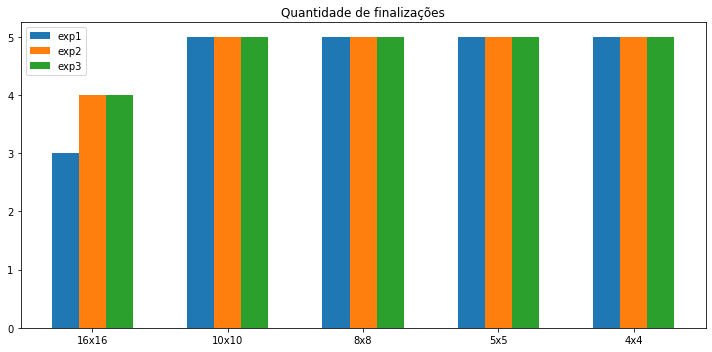

In [9]:
labels = ['16x16', '10x10', '8x8', '5x5', '4x4']
_exp1 = [3, 5, 5, 5, 5]
_exp2 = [4, 5, 5, 5, 5]
_exp3 = [4, 5, 5, 5, 5]

x = np.arange(len(labels))  # the label locations
width = 0.2

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width, _exp1, width, label='exp1')
rects2 = ax.bar(x , _exp2, width, label='exp2')
rects3 = ax.bar(x + width, _exp3, width, label='exp3')

ax.set_title('Quantidade de finalizações')ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Comparação velocidade de finalização

In [10]:
energy = {
    "4x4": 20,
    "5x5": 25,
    "8x8": 65,
    "10x10": 100,
    "16x16": 200
}

In [14]:
temp1 = exp1.groupby(['env','exp']).count()['energy'].reset_index()
temp2 = exp2.groupby(['env','exp']).count()['energy'].reset_index()
temp3 = exp3.groupby(['env', 'config', 'exp']).count()['energy'].reset_index()

for env in ['16x16', '10x10', '8x8', '5x5', '4x4']:
    temp1['max'] = temp1['env'].apply(lambda x: energy[x])
    temp2['max'] = temp2['env'].apply(lambda x: energy[x])
    temp3['max'] = temp3['env'].apply(lambda x: energy[x])

In [15]:
x1 = temp1[temp1['energy'] != temp1['max']].groupby('env').min()['energy'].reset_index().rename(columns={"energy": "min1"})
x2 = temp1[temp1['energy'] != temp1['max']].groupby('env').max()['energy'].reset_index().rename(columns={"energy": "max1"})
x3 = temp1[temp1['energy'] != temp1['max']].groupby('env').mean()['energy'].reset_index().rename(columns={"energy": "mean1"})

df1 = pd.merge(x1, pd.merge(x2, x3))

In [16]:
x1 = temp2[temp2['energy'] != temp2['max']].groupby('env').min()['energy'].reset_index().rename(columns={"energy": "min2"})
x2 = temp2[temp2['energy'] != temp2['max']].groupby('env').max()['energy'].reset_index().rename(columns={"energy": "max2"})
x3 = temp2[temp2['energy'] != temp2['max']].groupby('env').mean()['energy'].reset_index().rename(columns={"energy": "mean2"})

df2 = pd.merge(x1, pd.merge(x2, x3))

In [17]:
x1 = temp3[temp3['energy'] != temp3['max']].groupby('env').min()['energy'].reset_index().rename(columns={"energy": "min3"})
x2 = temp3[temp3['energy'] != temp3['max']].groupby('env').max()['energy'].reset_index().rename(columns={"energy": "max3"})
x3 = temp3[temp3['energy'] != temp3['max']].groupby('env').mean()['energy'].reset_index().rename(columns={"energy": "mean3"})

df3 = pd.merge(x1, pd.merge(x2, x3))

In [22]:
pd.merge(df1, pd.merge(df2, df3))

,env,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3
0,10x10,20,82,58.4,16,48,28.8,14,28,22.8
1,16x16,70,146,114.0,36,116,83.5,22,70,52.0
2,4x4,4,4,4.0,4,4,4.0,4,4,4.0
3,5x5,5,7,5.4,5,7,5.4,5,7,5.4
4,8x8,12,50,21.2,10,22,16.0,16,18,16.4


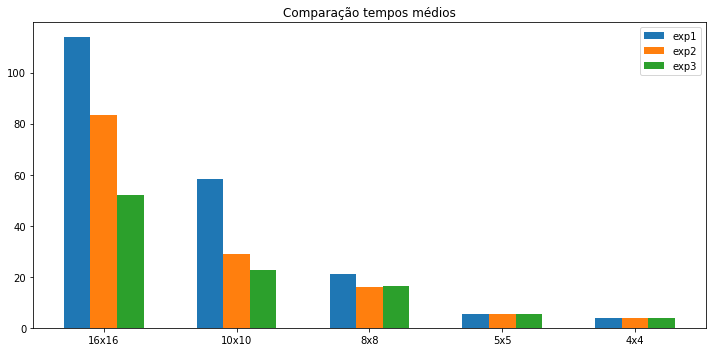

In [24]:
labels = ['16x16', '10x10', '8x8', '5x5', '4x4']
_exp1 = [114,58.4,21.2,5.4,4]
_exp2 = [83.5,28.8,16,5.4,4]
_exp3 = [52,22.8,16.4,5.4,4]

x = np.arange(len(labels))  # the label locations
width = 0.2

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width, _exp1, width, label='exp1')
rects2 = ax.bar(x , _exp2, width, label='exp2')
rects3 = ax.bar(x + width, _exp3, width, label='exp3')

ax.set_title('Comparação tempos médios')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

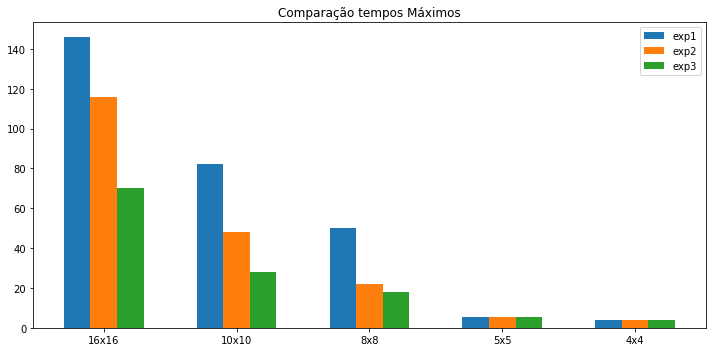

In [25]:
labels = ['16x16', '10x10', '8x8', '5x5', '4x4']
_exp1 = [146,82,50,5.4,4]
_exp2 = [116,48,22,5.4,4]
_exp3 = [70,28,18,5.4,4]

x = np.arange(len(labels))  # the label locations
width = 0.2

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width, _exp1, width, label='exp1')
rects2 = ax.bar(x , _exp2, width, label='exp2')
rects3 = ax.bar(x + width, _exp3, width, label='exp3')

ax.set_title('Comparação tempos Máximos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

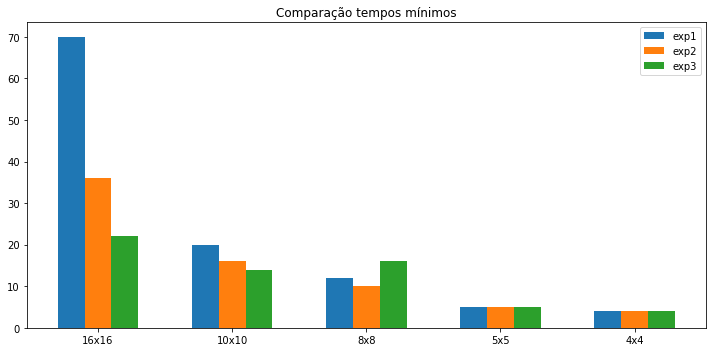

In [23]:
labels = ['16x16', '10x10', '8x8', '5x5', '4x4']
_exp1 = [70,20,12,5,4]
_exp2 = [36,16,10,5,4]
_exp3 = [22,14,16,5,4]

x = np.arange(len(labels))  # the label locations
width = 0.2

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width, _exp1, width, label='exp1')
rects2 = ax.bar(x , _exp2, width, label='exp2')
rects3 = ax.bar(x + width, _exp3, width, label='exp3')

ax.set_title('Comparação tempos mínimos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Distribuição de current state

In [26]:
exp_1 = exp1.copy()
exp_2 = exp2.copy()
exp_3 = exp3.copy()

In [27]:
labels = {
    '16x16': 16,
    '10x10': 10,
    '8x8': 8,
    '5x5': 5,
    '4x4': 4}

In [28]:
exp_1['env2'] = exp_1['env'].apply(lambda x: labels[x])
exp_2['env2'] = exp_2['env'].apply(lambda x: labels[x])
exp_3['env2'] = exp_3['env'].apply(lambda x: labels[x])

In [29]:
temp1 = exp_1.groupby(['env','exp', 'current']).count()['goal'].reset_index()
temp1 = temp1.groupby(['env', 'current']).mean()['goal'].reset_index()
temp1.set_index('current', inplace = True)

temp2 = exp2.groupby(['env','exp', 'current']).count()['goal'].reset_index()
temp2 = temp2.groupby(['env', 'current']).mean()['goal'].reset_index()
temp2.set_index('current', inplace = True)

temp3 = exp3.groupby(['env','exp', 'current']).count()['goal'].reset_index()
temp3 = temp3.groupby(['env', 'current']).mean()['goal'].reset_index()
temp3.set_index('current', inplace = True)

In [34]:
dfs = [temp1, temp2, temp3]
labels = ['sen1', 'sens2', 'sens3']

In [36]:
for env in ['16x16', '10x10', '8x8', '5x5', '4x4']:
    for i in range(len(labels)):
        dfs[i][dfs[i]['env'] == env].plot.pie(y = 'goal', title=env+"-"+labels[i])

